In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
from google.cloud import bigquery

In [4]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/ykath/Downloads/eastern-perigee-307720-5e9eb7dab12e.json"
client = bigquery.Client()

In [5]:
%load_ext google.cloud.bigquery

In [6]:
%%bigquery state_2018_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.state_2018_5yr`

Downloading: 100%|███████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 28.01rows/s]


In [7]:
 state_2018_5yr.shape

(52, 242)

In [8]:
for col in state_2018_5yr.columns:
    print(col)

geo_id
do_date
total_pop
households
male_pop
female_pop
median_age
male_under_5
male_5_to_9
male_10_to_14
male_15_to_17
male_18_to_19
male_20
male_21
male_22_to_24
male_25_to_29
male_30_to_34
male_35_to_39
male_40_to_44
male_45_to_49
male_50_to_54
male_55_to_59
male_60_to_61
male_62_to_64
male_65_to_66
male_67_to_69
male_70_to_74
male_75_to_79
male_80_to_84
male_85_and_over
female_under_5
female_5_to_9
female_10_to_14
female_15_to_17
female_18_to_19
female_20
female_21
female_22_to_24
female_25_to_29
female_30_to_34
female_35_to_39
female_40_to_44
female_45_to_49
female_50_to_54
female_55_to_59
female_60_to_61
female_62_to_64
female_65_to_66
female_67_to_69
female_70_to_74
female_75_to_79
female_80_to_84
female_85_and_over
white_pop
population_1_year_and_over
population_3_years_over
pop_5_years_over
pop_15_and_over
pop_16_over
pop_25_years_over
pop_25_64
pop_never_married
pop_now_married
pop_separated
pop_widowed
pop_divorced
not_us_citizen_pop
black_pop
asian_pop
hispanic_pop
amerindi

In [9]:
allStates_pop = state_2018_5yr['total_pop'].sum()
average_income =  ((state_2018_5yr['income_per_capita']*state_2018_5yr['total_pop']).sum())/allStates_pop
average_income

32411.262103872632

In [10]:
bins_ = [
    'income_less_10000',
    'income_10000_14999',
    'income_15000_19999',
    'income_20000_24999',
    'income_25000_29999',
    'income_30000_34999',
    'income_35000_39999',
    'income_40000_44999',
    'income_45000_49999',
    'income_50000_59999',
    'income_60000_74999',
    'income_75000_99999',
    'income_100000_124999',
    'income_125000_149999',
    'income_150000_199999',
    'income_200000_or_more'
]

In [11]:
state_2018_5yr.head()

,geo_id,do_date,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_to_61,male_62_to_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_pop,population_1_year_and_over,population_3_years_over,pop_5_years_over,pop_15_and_over,pop_16_over,pop_25_years_over,pop_25_64,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bac

In [12]:
print(state_2018_5yr['households'])

0      1152175.0
1       253462.0
2       357765.0
3      9553046.0
4       618331.0
5      7621760.0
6       957619.0
7      3918597.0
8      1894711.0
9      3709488.0
10     2524300.0
11     1075930.0
12      281322.0
13     7316537.0
14      410885.0
15     2601914.0
16     5025132.0
17     1367374.0
18     3213362.0
19     4830038.0
20     4654075.0
21     1256855.0
22     3909509.0
23      754063.0
24     2343129.0
25     1124549.0
26     2553818.0
27    12965435.0
28      734676.0
29      259589.0
30      556955.0
31     2396271.0
32     2167801.0
33      341565.0
34     2192518.0
35      423240.0
36      528078.0
37     1205075.0
38     1591835.0
39     1474620.0
40      314903.0
41      456782.0
42      230630.0
43     1728681.0
44     1736021.0
45     2800423.0
46      775651.0
47     3128415.0
48     1860269.0
49     2113387.0
50     1105576.0
51     2567061.0
Name: households, dtype: float64


In [13]:
household = 0
for bin_ in bins_:
    household+=state_2018_5yr[bin_]
print(household)

0      1152175.0
1       253462.0
2       357765.0
3      9553046.0
4       618331.0
5      7621760.0
6       957619.0
7      3918597.0
8      1894711.0
9      3709488.0
10     2524300.0
11     1075930.0
12      281322.0
13     7316537.0
14      410885.0
15     2601914.0
16     5025132.0
17     1367374.0
18     3213362.0
19     4830038.0
20     4654075.0
21     1256855.0
22     3909509.0
23      754063.0
24     2343129.0
25     1124549.0
26     2553818.0
27    12965435.0
28      734676.0
29      259589.0
30      556955.0
31     2396271.0
32     2167801.0
33      341565.0
34     2192518.0
35      423240.0
36      528078.0
37     1205075.0
38     1591835.0
39     1474620.0
40      314903.0
41      456782.0
42      230630.0
43     1728681.0
44     1736021.0
45     2800423.0
46      775651.0
47     3128415.0
48     1860269.0
49     2113387.0
50     1105576.0
51     2567061.0
Name: income_less_10000, dtype: float64


In [14]:
state_2018_5yr['households'] - household #Checking to see if all the households are distributed by income

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
dtype: float64

In [15]:
state_2018_5yr

,geo_id,do_date,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_60_to_61,male_62_to_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,white_pop,population_1_year_and_over,population_3_years_over,pop_5_years_over,pop_15_and_over,pop_16_over,pop_25_years_over,pop_25_64,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,asian_male_45_54,asian_male_55_64,black_male_45_54,black_male_55_64,hispanic_male_45_54,hispanic_male_55_64,white_male_45_54,white_male_55_64,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bac

In [16]:
binMiddle = [
    5000,
    12500,
    17500,
    22500,
    27500,
    32500,
    37500,
    42500,
    47500,
    55000,
    67500,
    87500,
    112500,
    137500,
    175000,
    300000
    
]
def median_income(obs):
    household=0
    for idx,bin_ in enumerate(bins_):
        household+=obs[bin_]
        if household >= obs['medianincomePoint']:
            return binMiddle[idx]
        
    
state_2018_5yr['medianincomePoint']=state_2018_5yr['households']/2

state_2018_5yr['stateincomeMedian']=state_2018_5yr.apply(lambda row:median_income(row),axis=1)


In [17]:
state_2018_5yr['stateincomeMedian'].skew()


0.4030263027821765

<AxesSubplot:ylabel='Frequency'>

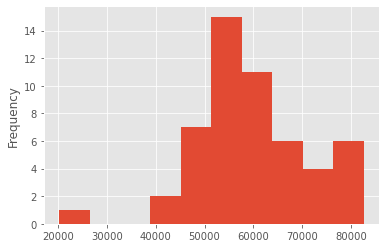

In [33]:
state_2018_5yr['median_income'].plot.hist()
